Random Forest in NLP for sentimental analysis

In [101]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
# Download the stopwords from NLTK
nltk.download('stopwords')

# Initialize the stemmer
stemmer = PorterStemmer()

print(stopwords.words('english')[:10])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [103]:
df = pd.read_csv('test.csv', encoding='cp1252')
print(df.head())

       textID  \
0  f87dea47db   
1  96d74cb729   
2  eee518ae67   
3  01082688c6   
4  33987a8ee5   

                                                                                                  text  \
0                                                    Last session of the day  http://twitpic.com/67ezh   
1   Shanghai is also really exciting (precisely -- skyscrapers galore). Good tweeps in China:  (SH)...   
2                       Recession hit Veronique Branquinho, she has to quit her company, such a shame!   
3                                                                                          happy bday!   
4                                                               http://twitpic.com/4w75p - I like it!!   

  sentiment Time of Tweet Age of User      Country  Population -2020  \
0   neutral       morning        0-20  Afghanistan        38928346.0   
1  positive          noon       21-30      Albania         2877797.0   
2  negative         night       31-45      A

In [104]:

df = df[['text', 'sentiment']]

# Check for NaN values in the DataFrame
print(df.isna().sum())

# Drop rows with NaN values
df = df.dropna()


#Data cleaning
df['text'] = df['text'].str.replace('[^\'\w\s]', '')
df['text'] = df['text'].str.lower()
stop = stopwords.words('english')
df['text'] = df['text'].astype(str)
df['text'] = df['text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split() if word not in (stop)]))
df = df.dropna(subset=['text'])

#vectorizer = TfidfVectorizer(ngram_range=(1, 2)) # Accuracy was less with n-gram grouping
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])

print(df.head())

text         1281
sentiment    1281
dtype: int64


C:\Users\dell\AppData\Local\Temp\ipykernel_5268\2964875760.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[^\'\w\s]', '')


                                                                      text  \
0                                     last session day httptwitpiccom67ezh   
1  shanghai also realli excit precis skyscrap galor good tweep china sh bj   
2                        recess hit veroniqu branquinho quit compani shame   
3                                                               happi bday   
4                                                 httptwitpiccom4w75p like   

  sentiment  
0   neutral  
1  positive  
2  negative  
3  positive  
4  positive  


In [105]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['sentiment'], test_size=0.2, random_state=42)


In [106]:
# Create and train the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Save the trained model and vectorizer
joblib.dump(clf, 'random_forest.joblib')
joblib.dump(vectorizer, 'vectorizer.joblib')


['vectorizer.joblib']

Accuracy: 0.6633663366336634
              precision    recall  f1-score   support

    negative       0.77      0.47      0.59       207
     neutral       0.59      0.79      0.67       286
    positive       0.75      0.67      0.71       214

    accuracy                           0.66       707
   macro avg       0.70      0.65      0.66       707
weighted avg       0.69      0.66      0.66       707



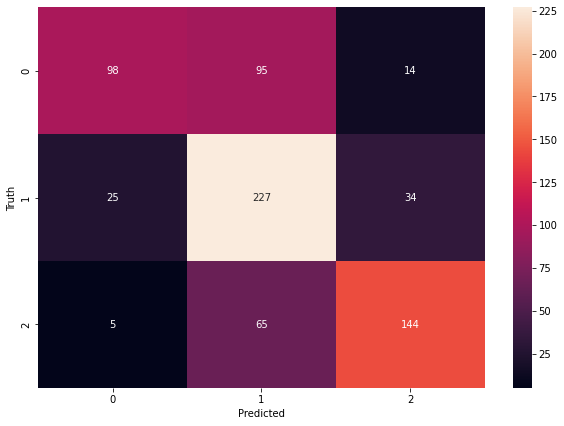

In [107]:
# Load the trained model and vectorizer
clf = joblib.load('random_forest.joblib')
vectorizer = joblib.load('vectorizer.joblib')


# Making predictions on the testing set and calculating the scores
y_pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


In [108]:
# Predict sentiment for a new comment
new_comment = ["I love this product!"]
new_comment_transform = vectorizer.transform(new_comment)
new_pred = clf.predict(new_comment_transform)
print('Sentiment:', new_pred[0])

Sentiment: positive
